In [1]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegresion():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y, use_np=False):
        self.cof = 0
        self.b = 0
        self.error = np.empty(0)
        for i in range(self.iterations):
            self.error = np.append(self.error, self.loss(X,Y))
            if use_np:
                if self.loss_der_numpy(X,Y) <= 0.001:
                    break
            else:
                if self.loss_der_pure(X,Y) <= 0.001:
                    break
        self.error = np.append(self.error, self.loss(X,Y))

        self.plot_results(X, Y)


    def predict(self, X):
        x = np.asarray(X)
        return x*self.cof+self.b

    def loss_der_pure(self, X, Y):
        cof_der = 0
        b_der = 0
        for x,y in zip(X,Y):
            cof_der -= 2*(y-x*self.cof-self.b)*x
            b_der -= 2*(y - self.cof*x - self.b)
        self.cof -= self.learning_rate*cof_der
        self.b -= self.learning_rate*b_der

        return self.learning_rate*abs(cof_der+b_der)

    def loss_der_numpy(self, X, Y):
        x = np.asarray(X)
        y = np.asarray(Y)

        cof_der = np.sum(-2*(y-x*self.cof-self.b)*x)
        b_der = np.sum(-2*(y - self.cof*x - self.b))

        self.cof -= self.learning_rate*cof_der
        self.b -= self.learning_rate*b_der

        return self.learning_rate*abs(cof_der+b_der)


    def plot_results(self, X, Y):
        fig = plt.figure(figsize=[1.5*6.4, 1.5*4.8])
        sub1 = fig.add_subplot(121)
        sub2 = fig.add_subplot(122)

        sub1.title.set_text('Error')
        sub2.title.set_text('Model')

        sub1.plot(list(range(len(self.error))), self.error)
        x = np.linspace(X.min()-1, X.max()+1, 1000)
        y = self.predict(x)
        sub2.plot(x,y)
        sub2.plot(X, Y, linestyle="",marker="o")

        fig.show()

    def loss(self, X, Y):
        x = np.asarray(X)
        y = np.asarray(Y)

        return np.sum((y-x*self.cof-self.b)**2)

    def RMSE(self, X, Y):
        return ((self.loss(X,Y))/len(X))**(1/2)

    def MAE(self, X, Y):
        x = np.asarray(X)
        y = np.asarray(Y)

        return np.sum(abs(y-x*self.cof-self.b))/len(X)

    def R2(self, X ,Y):
        x = np.asarray(X)
        y = np.asarray(Y)
        return np.sum((self.predict(x)-y.mean())**2)/np.sum((y-y.mean())**2)


In [2]:
experience = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salary = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])

linreg = LinearRegresion(learning_rate=0.0001, iterations=1000)

/tmp/ipykernel_11203/1719980063.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Prediction (x, prediction for x)
[(2.4, 2.4049666529800353), (5.0, 4.831658647419237), (1.5, 1.564957885674158), (3.8, 3.711646957678067), (8.7, 8.285028024121178), (3.6, 3.5249783427212056), (1.2, 1.2849549632388653), (8.1, 7.725022179250594), (2.5, 2.498300960458466), (5.0, 4.831658647419237), (1.6, 1.6582921931525887), (1.6, 1.6582921931525887), (2.4, 2.4049666529800353), (3.9, 3.8049812651564983), (5.4, 5.204995877332961)]
RMSE=0.41339955035517556, MAE=0.3114270292994922, R^2=0.8101271148465777


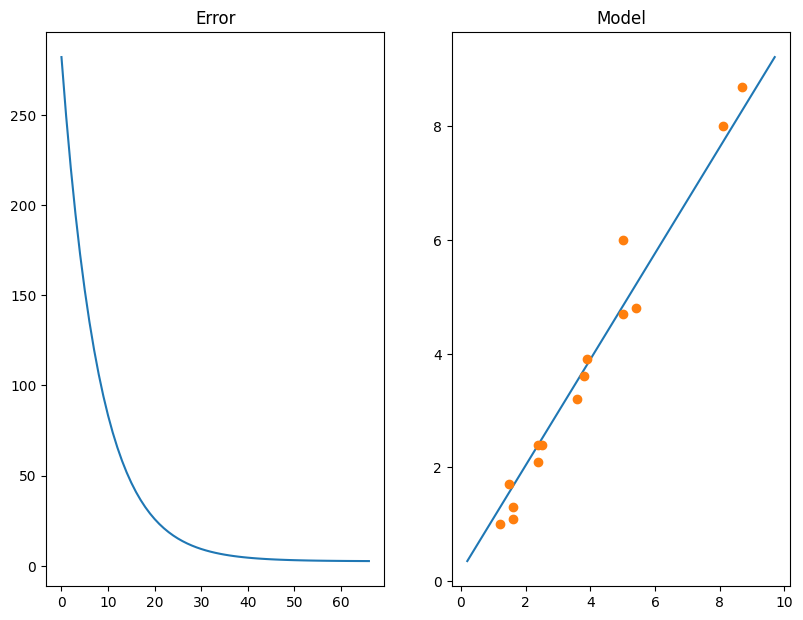

In [3]:
linreg.fit(experience, salary, use_np=True)
print(f"Prediction (x, prediction for x)\n{list(zip(experience, linreg.predict(experience)))}")
print(f"RMSE={linreg.RMSE(experience, salary)}, MAE={linreg.MAE(experience, salary)}, R^2={linreg.R2(experience, salary)}")